## Fonte de dados

O dataset utilizado nessa análise foi encontrado no Kaggle e contém dados das 50 músicas mais ouvidas de 2019 no Spotify. 

O arquivo pode ser acessado no link: https://www.kaggle.com/leonardopena/top50spotify2019

## Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Leitura e visualização do dataset

In [2]:
dados = pd.read_csv('top50.csv', sep = ',', encoding = 'ISO-8859-1')

In [3]:
dados.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [4]:
# Significados das colunas

# Track.Name = Name of the Track
# Artist.Name = Name of the Artist
# Genre = the genre of the track
# Beats.Per.Minute = The tempo of the song.
# Energy = The energy of a song - the higher the value, the more energtic. song
# Danceability = The higher the value, the easier it is to dance to this song.
# Loudness..dB.. = The higher the value, the louder the song.
# Liveness = The higher the value, the more likely the song is a live recording.
# Valence. = The higher the value, the more positive mood for the song.
# Length. = The duration of the song.
# Acousticness.. = The higher the value the more acoustic the song is.
# Speechiness. = The higher the value the more spoken word the song contains.
# Popularity = The higher the value the more popular the song is.

## Análise exploratória

In [5]:
# Verificando a existência de valores nulos e tipo dos dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [6]:
# Análise estatística inicial das variáveis numéricas

dados.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [7]:
# Renomeando as colunas para facilitar a manipulação dos dados

nome_coluna = { 'Track.Name':'track_name',
    'Artist.Name': 'artist',
    'Genre': 'genre',
    'Beats.Per.Minute':'bpm',
    'Energy': 'energy',
    'Danceability': 'danceability',
    'Loudness..dB..':'loudness',
    'Liveness': 'liveness', 
    'Valence.': 'valence', 
    'Length.': 'length',
    'Acousticness..': 'acousticness', 
    'Speechiness.': 'speechiness', 
    'Popularity': 'popularity'}

dados.rename(columns = nome_coluna, inplace = True)

In [8]:
# Removendo coluna unnamed pois está sendo utilizada somente como index e não é relevante na análise dos dados

del dados['Unnamed: 0']

# Avaliando correlações

In [9]:
# Verificando correlações entre as variáveis

correlacao = dados.corr()
correlacao

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
bpm,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
loudness,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


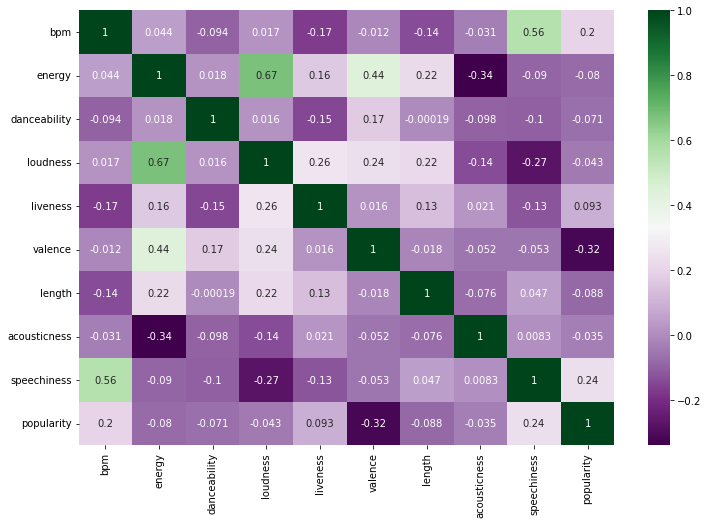

In [10]:
# Avaliando correlações pelo mapa de calor de modo a facilitar a visualização

ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(correlacao, annot=True, cmap = 'PRGn')

Avaliando as correlações entre as variáveis é possível identificar destaques para a correlação positiva entre 'loudness' e 'energy', bem como a correlação negativa entre 'energy' e 'acousticness'.

Destacando as correlações da variável popularity, verifica-se que 'speechiness' e 'bpm' tem o maior efeito positivo sobre a mesma. Em contrapartida, 'valence' tem uma relação inversa com a popularidade, o que traz um indício de que músicas menos positivas são mais populares.

### Análise de popularidade

<AxesSubplot:>

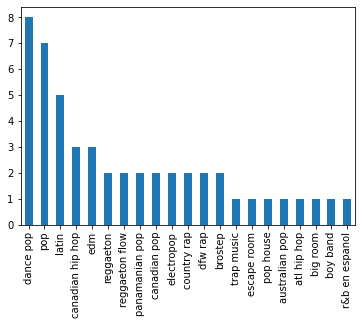

In [11]:
# Avaliando gênero musical que figurou mais vezes entre as 50 músicas mais ouvidas de 2019 no Spotify

dados.genre.value_counts().plot(kind='bar')

É possível identificar que o gênero mais popular dentre as 50 músicas mais ouvidas de 2019 no Spotify foi o dance pop, com 8 músicas, seguido de pop com 7 canções e latina com 5.

In [12]:
# Avaliando os artistas que mais emplacaram músicas no Top 50 do Spotify em 2019

dados.artist.value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: artist, dtype: int64

Aqui verifica-se que o artista mais bem sucedido em quantidade de músicas no top 50 foi Ed Sheeran, colocando um total de 4 músicas entre as mais ouvidas de 2019.

### Investigando as variáveis explicativas com maior correlação absoluta à popularidade 

Text(0.5, 1.0, 'Distribuição de frequência - Valence')

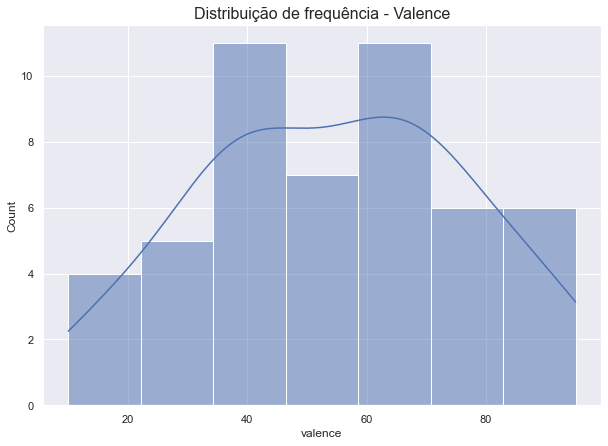

In [13]:
#Plotando o gráfico de distribuição de frequências de Valence

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="valence", kde=True).set_title("Distribuição de frequência - Valence", fontsize = 16)

Text(0.5, 1.0, 'Distribuição de frequência - Speechiness')

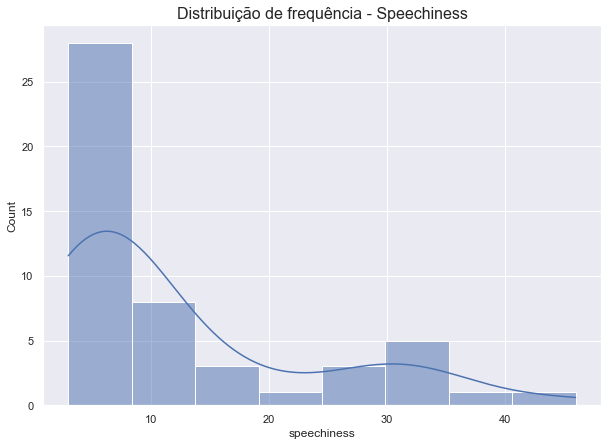

In [14]:
#Plotando o gráfico de distribuição de frequências de Speechiness

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="speechiness", kde=True).set_title("Distribuição de frequência - Speechiness", fontsize = 16)

Text(0.5, 1.0, 'Distribuição de frequência - Beats per minute')

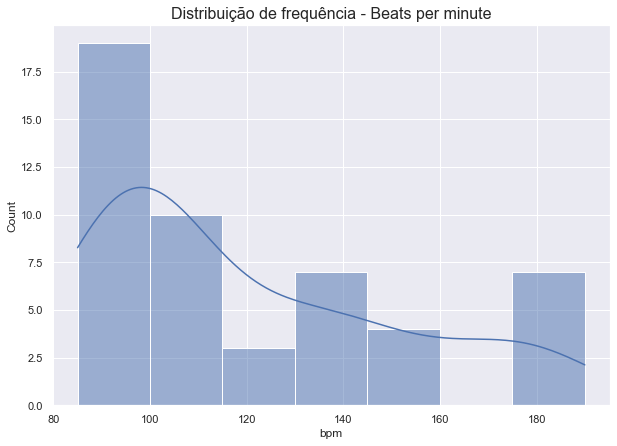

In [15]:
#Plotando o gráfico de distribuição de frequências de Beats per minute (BPM)

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="bpm", kde=True).set_title("Distribuição de frequência - Beats per minute", fontsize = 16)

In [16]:
# Exibindo as informações ordenadas por popularidade

dados.sort_values('popularity', ascending = False)

,track_name,artist,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


## Agrupando as músicas em maior ou menor popularidade

In [26]:
# Verificando o valor da mediana da popularidade

dados.popularity.median()

88.0

A fim de analisar em maior detalhe o comportamento das variáveis com maior correlação absoluta com a popularidade (valence, bpm e speechiness), adicionarei uma coluna classificando as músicas de acordo com a popularidade.

Devido a pequena quantidade de dados disponíveis no dataset, notadamente a baixa frequência de músicas com popularidades menores que 80, separei o dataset em apenas duas classes, utilizando a média e a mediana como referência. 

In [18]:
# Criando as classes de acordo com a pontuação de popularidade 

classes = [70, 88, 95]

In [19]:
# Definindo os títulos das classes

labels = ['menor_pop', 'maior_pop']

In [20]:
# Criando as categorias e adicionando a nova coluna ao dataset

selecao = pd.cut(dados.popularity, classes, labels = labels, include_lowest = True)
dados['classe_pop'] = selecao

In [21]:
# Exibindo a nova coluna no dataset

dados.head()

,track_name,artist,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity,classe_pop
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,menor_pop
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,maior_pop
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,menor_pop
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,menor_pop
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,maior_pop


Text(0.5, 1.0, 'Distribuição de frequência por classe de popularidade - Valence')

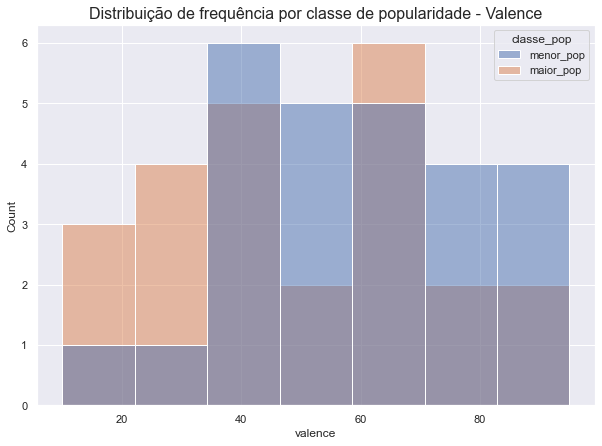

In [22]:
# Plotando o gráfico de distribuição de frequências por classe de popularidade da variável Valence 

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="valence", hue = 'classe_pop').set_title(
    "Distribuição de frequência por classe de popularidade - Valence", fontsize = 16)

Text(0.5, 1.0, 'Distribuição de frequência por classe de popularidade - Beats per minute')

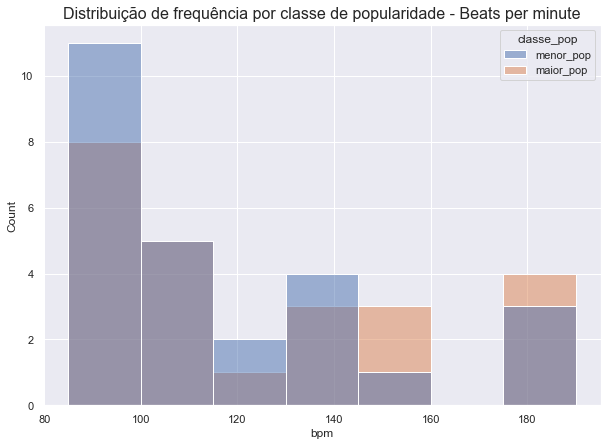

In [27]:
#Plotando o gráfico de distribuição de frequências por classe de popularidade da variável Beats per minute (BPM)

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="bpm", hue = 'classe_pop').set_title(
    "Distribuição de frequência por classe de popularidade - Beats per minute", fontsize = 16)

Text(0.5, 1.0, 'Distribuição de frequência por classe de popularidade - Speechiness')

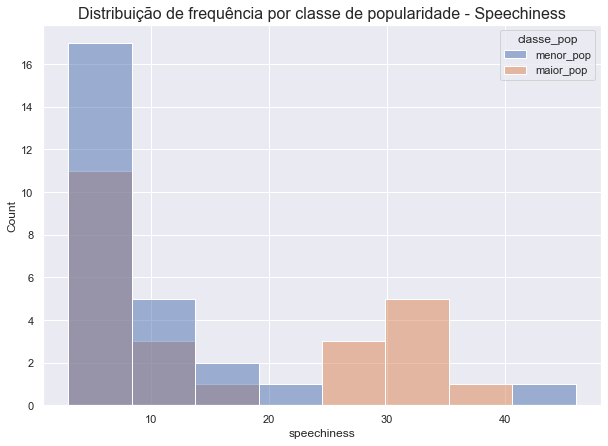

In [28]:
#Plotando o gráfico de distribuição de frequências por classe de popularidade da variável de Speechiness

sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=dados, x="speechiness", hue = 'classe_pop').set_title(
    "Distribuição de frequência por classe de popularidade - Speechiness", fontsize = 16)

A partir dos gráficos é possível confirmar visualmente a correlação média dessas variáveis com a popularidade. 

Pela visualização de distribuição de frequência é possível ainda inferir as faixas onde a relevância das variáveis foi maior, como é o caso do gráfico "Distribuição de frequência por classe de popularidade - Speecheness", onde as músicas mais populares se destacam na faixa entre 25 e 40, enquanto as músicas menos populares se concentram na região de menos palavras faladas.